# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
cities = "Paris"

In [3]:
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(query_url + cities).json()
response

{'coord': {'lon': 2.35, 'lat': 48.86},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 65.75,
  'pressure': 1010,
  'humidity': 72,
  'temp_min': 63,
  'temp_max': 68},
 'visibility': 10000,
 'wind': {'speed': 10.29, 'deg': 180},
 'clouds': {'all': 99},
 'dt': 1570900173,
 'sys': {'type': 1,
  'id': 6540,
  'country': 'FR',
  'sunrise': 1570860333,
  'sunset': 1570900110},
 'timezone': 7200,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

In [4]:
# List for holding lat_lngs and cities
cities = []
lat_lngs = []
lon_lngs = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# set up lists to hold reponse info
lat_lngs = []
temp = []
humidity = []
cloudiness = []
cloud_percentage = []
wind_speed = []
city_log = []
city_count = []
citycount = 0

error_cities_lat = []
error_cities_temp = []
error_cities_humidity = []
error_cities_cloudiness = []
error_cities_cloud_percent = []
error_cities_wind_speed = []

Temperature (F) vs. Latitude

Humidity (%) vs. Latitude

Cloudiness (%) vs. Latitude

Wind Speed (mph) vs. Latitude

In [6]:
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

for city in cities:
    response = requests.get(query_url + city).json()
    
    city_log.append(city)
    citycount += 1
    city_count.append(citycount)
    
    #cloudiness
    try:
        cloudiness.append(response['weather'][0]['description'])
    except KeyError:
        #print(f"The error line for cloudiness is: {city}")
        error_cities_cloudiness.append(city)
        #cloudiness.append('NaN')
        
    #cloud percentage
    try:
        cloud_percentage.append(response['clouds']['all'])
    except KeyError:
        #print(f"The error line for cloudiness is: {city}")
        error_cities_cloud_percent.append(city)
        #cloud_percentage.append('NaN')
    
    #WindSpeed
    try:
        wind_speed.append(response['wind']['speed'])
    except KeyError:
        #print(f"The error line for wind speed is: {city}")
        error_cities_wind_speed.append(city)
        #wind_speed.append('NaN')
    
    #Humidity
    try:
        humidity.append(response['main']['humidity'])
    except KeyError:
        #print(f"The error line for humidity is: {city}")
        error_cities_humidity.append(city)
        #humidity.append('NaN')
    
    #Latitudinal Coordinates
    try:
        lat_lngs.append(response['coord']['lat'])
    except KeyError:
        #print(f"The error line for lat is: {city}")
        error_cities_lat.append(city)
        #lat_lngs.append('NaN')
    
    #Temperature
    try:
        temp.append(response['main']['temp'])
    except KeyError:
        #print(f"The error line for temp is: {city}")
        error_cities_temp.append(city)
        #temp.append('NaN')

In [7]:
print(len(error_cities_temp))

66


In [8]:
print(len(temp))

547


In [9]:
city_total_dict = dict(zip(city_count, city_log))
#print("Cities: ", city_total_dict)

In [ ]:
for k, v in d.items():
    print(k, v)

In [33]:
#Include a print log of each city as it's being processed with the city number and city name.

with open('Output/CityLog.txt', 'w') as text_file:
    text_file.write("City Log:")
    for k, v in city_total_dict.items():
        pair = ("\n" + str(k) + " " + v)
        text_file.write(pair)
    text_file.close()

    

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_df = pd.DataFrame(list(zip(cities, lat_lngs, temp, humidity, wind_speed, cloudiness, cloud_percentage)), columns = ['Cities', 'Latitudinal Coordinates', 'Temperature', 'Humidity', 'WindSpeed', 'Sky Condition', 'Cloud Percentage'])
weather_df.head(10)

,Cities,Latitudinal Coordinates,Temperature,Humidity,WindSpeed,Sky Condition,Cloud Percentage
0,maryville,35.76,54.88,71,4.89,overcast clouds,90
1,ribeira grande,38.52,64.40,52,17.22,scattered clouds,40
2,qaqortoq,60.72,33.80,80,2.24,mist,75
3,tabarqah,-7.01,71.49,90,3.89,light rain,100
4,mwene-ditu,-18.48,68.22,59,11.41,scattered clouds,34
5,arica,-54.81,34.57,92,6.93,snow,75
6,ushuaia,40.36,71.96,62,11.99,scattered clouds,36
7,belmonte,-53.16,41.00,60,29.97,scattered clouds,40
8,punta arenas,55.74,32.00,78,21.92,scattered clouds,40
9,thompson,70.62,20.73,95,8.83,light snow,90


In [11]:
# Export file as a CSV, without the Pandas index, but with the header
weather_df.to_csv("Output/weatherCites.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [12]:
weather_df.head(10)

,Cities,Latitudinal Coordinates,Temperature,Humidity,WindSpeed,Sky Condition,Cloud Percentage
0,maryville,35.76,54.88,71,4.89,overcast clouds,90
1,ribeira grande,38.52,64.40,52,17.22,scattered clouds,40
2,qaqortoq,60.72,33.80,80,2.24,mist,75
3,tabarqah,-7.01,71.49,90,3.89,light rain,100
4,mwene-ditu,-18.48,68.22,59,11.41,scattered clouds,34
5,arica,-54.81,34.57,92,6.93,snow,75
6,ushuaia,40.36,71.96,62,11.99,scattered clouds,36
7,belmonte,-53.16,41.00,60,29.97,scattered clouds,40
8,punta arenas,55.74,32.00,78,21.92,scattered clouds,40
9,thompson,70.62,20.73,95,8.83,light snow,90


#### Latitude vs. Temperature Plot

In [13]:
lat_temp_df = weather_df[["Latitudinal Coordinates", "Temperature"]]
lat_temp_df.head(10)

,Latitudinal Coordinates,Temperature
0,35.76,54.88
1,38.52,64.40
2,60.72,33.80
3,-7.01,71.49
4,-18.48,68.22
5,-54.81,34.57
6,40.36,71.96
7,-53.16,41.00
8,55.74,32.00
9,70.62,20.73


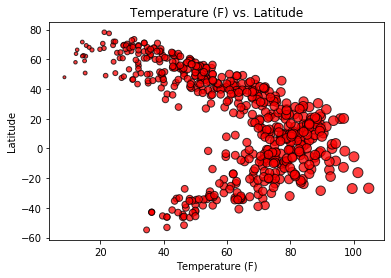

In [14]:
# List of values from 0 to 100 each value being 1 greater than the last
x_axis = lat_temp_df["Temperature"]

# Create a random array of data that we will use for our y values
data = lat_temp_df["Latitudinal Coordinates"]

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")

plt.savefig('Output/Temperature_Latitude_Comparison.png')


In [15]:
# Prints the scatter plot to the screen
plt.show()

#### Latitude vs. Humidity Plot

In [16]:
lat_humid_df = weather_df[["Latitudinal Coordinates", "Humidity"]]
lat_humid_df.head()

,Latitudinal Coordinates,Humidity
0,35.76,71
1,38.52,52
2,60.72,80
3,-7.01,90
4,-18.48,59


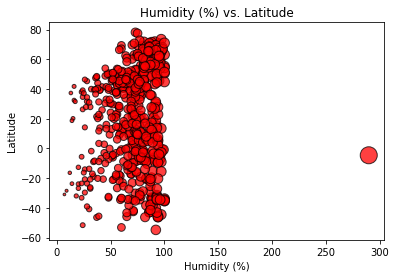

In [17]:
# List of values from 0 to 100 each value being 1 greater than the last
x_axis = lat_humid_df["Humidity"]

# Create a random array of data that we will use for our y values
data = lat_humid_df["Latitudinal Coordinates"]

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

plt.savefig('Output/Humidity_Latitude_Comparison.png')

#### Latitude vs. Cloudiness Plot

In [18]:
lat_cloud_df = weather_df[["Latitudinal Coordinates", "Sky Condition", "Cloud Percentage"]]
lat_cloud_df.head()

,Latitudinal Coordinates,Sky Condition,Cloud Percentage
0,35.76,overcast clouds,90
1,38.52,scattered clouds,40
2,60.72,mist,75
3,-7.01,light rain,100
4,-18.48,scattered clouds,34


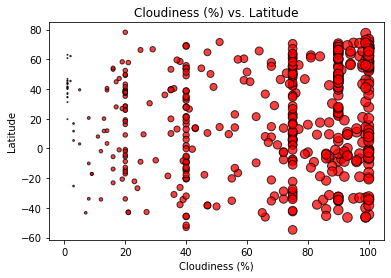

In [19]:
# List of values from 0 to 100 each value being 1 greater than the last
x_axis = lat_cloud_df["Cloud Percentage"]

# Create a random array of data that we will use for our y values
data = lat_cloud_df["Latitudinal Coordinates"]

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

plt.savefig('Output/Cloudiness_Latitude_Comparison.png')

#### Latitude vs. Wind Speed Plot

In [20]:
lat_wind_df = weather_df[["Latitudinal Coordinates", "WindSpeed"]]
lat_wind_df.head()

,Latitudinal Coordinates,WindSpeed
0,35.76,4.89
1,38.52,17.22
2,60.72,2.24
3,-7.01,3.89
4,-18.48,11.41


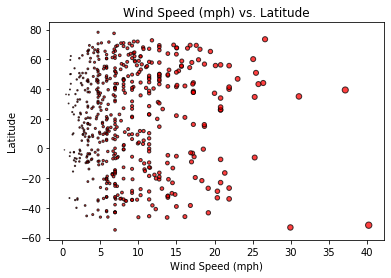

In [21]:
# List of values from 0 to 100 each value being 1 greater than the last
x_axis = lat_wind_df["WindSpeed"]

# Create a random array of data that we will use for our y values
data = lat_wind_df["Latitudinal Coordinates"]

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")

plt.savefig('Output/WindSpeed_Latitude_Comparison.png')